 #                 TP de traitement de données manquantes et aberrantes
 

#### TP effectué par MADAD Sarra, ABDELKADER Mohamed et NOUAR Manelle.

On se propose d’étudier ici le dataset « Auto miles per gallon » contenant les données de plusieurs véhicules, notamment leur consommation (exprimées en miles per gallon, correspondant à la distance parcourue pour un volume donné de carburant en unités impériales).

Il faudra utiliser la bibliothèque scikit-learn.

### 1) Chargement et analyse préliminaire des données
#### a) Après avoir pris connaissance du dataset (auto-mpg-dataset.txt) et de sa description (autompg-description.txt), indiquez pour chaque colonne si la variable est qualitative ou quantitative.

#### b) Charger les données à partir du fichier texte contenant le dataset. L’objectif est de parvenir à un objet pandas.DataFrame.
Pour y parvenir, vous pouvez au choix :

• écrire une fonction qui analyse le contenu du fichier pour en extraire les différentes données ;

• écrire une fonction qui transforme le fichier afin de le transformer en un fichier CSV valide que vous pourrez lire avec la fonction pandas.read_csv.

#### c) Déterminer pour chaque colonne, à l’aide d’une fonction, le nombre de valeurs manquantes et leur taux (# valeurs manquantes/# valeurs total).

#### d) Représenter graphiquement les données à l’aide de plusieurs nuages de points en deux dimensions.
L’axe vertical devra correspondre à la consommation (première colonne) et l’axe horizontal devra correspondre successivement à toutes les autres variables quantitatives



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Chargement des données
def lecture_dataset():
    columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
    dataset = pd.read_csv("C:/Users/sarah/OneDrive/Bureau/auto-mpg-dataset.txt", delimiter = r"\s+", names = columns)
    return dataset

In [3]:
dataset = lecture_dataset()
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


Nous avons 406 observations de 9 features chacun.

Ces features sont :
- mpg (consommation) : variable quantitative
- cylinders (cylindres) : variable quantitative
- displacement (déplacement) : variable quantitative
- horsepower (puissance) : variable quantitative
- weight (poids) : variable quantitative
- acceleration (accélération) : variable quantitative
- model year (année du modèle) : variable quantitative
- origin (origine) : variable quantitative
- car name (nom de la voiture) : variable qualitative

Intéressons nous maintenant aux nombres données manquantes.

In [4]:
print(dataset.isna())

       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    False      False         False       False   False         False   
1    False      False         False       False   False         False   
2    False      False         False       False   False         False   
3    False      False         False       False   False         False   
4    False      False         False       False   False         False   
..     ...        ...           ...         ...     ...           ...   
401  False      False         False       False   False         False   
402  False      False         False       False   False         False   
403  False      False         False       False   False         False   
404  False      False         False       False   False         False   
405  False      False         False       False   False         False   

     model year  origin  car name  
0         False   False     False  
1         False   False     False  
2         False

In [6]:
#on récupère le nombre de valeurs manquantes par colonne et leur taux
def valeurs_manquantes(dataset):
    columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
    liste = []
    taux = []
    for i in range (0,9):
        cnt = dataset[columns[i]].isna().sum()
        liste.append(cnt)
    for i in range (0,9):
        decompte = liste[i]/406 
        taux.append(decompte)
    nbrNA = pd.DataFrame(list(zip(columns, liste, taux)), columns = ['Nom de la variable','Nombre de NA', 'Taux'])
    print(nbrNA)

valeurs_manquantes(dataset)

  Nom de la variable  Nombre de NA      Taux
0                mpg             8  0.019704
1          cylinders             0  0.000000
2       displacement             0  0.000000
3         horsepower             6  0.014778
4             weight             0  0.000000
5       acceleration             0  0.000000
6         model year             0  0.000000
7             origin             0  0.000000
8           car name             0  0.000000


<AxesSubplot:xlabel='mpg'>

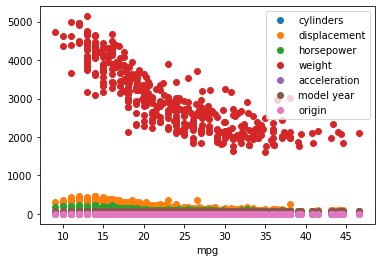

In [7]:
#on représente nos données à l'aide de nuages de points (x = mpg et y = le reste)
dataset.plot(x="mpg",style='o') 

### 2) Transformation du dataset : variation du taux de données manquantes
###### Vous avez sans doute remarqué que le nombre de données manquantes dans ce dataset est relativement faible.
###### Afin de mettre en œuvre les méthodes présentées en cours et d’étudier leur efficacité, nous nous proposons d’augmenter artificiellement le taux de données manquantes, à une valeur fixée par l’utilisateur, en supprimant des données présentes.
###### Vous devez donc écrire deux fonctions :
###### 1. une première qui supprimera aléatoirement des données dans une colonne donnée.

In [78]:
from random import randrange
import warnings 
warnings.filterwarnings("ignore") 

def suppression_aleatoire(dataset):
    df1 = dataset.copy()
    df1['acceleration'][randrange(len(df1))] = np.nan
    return df1

new_df = suppression_aleatoire(dataset)
print(new_df)
valeurs_manquantes(new_df)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0        8.0         307.0       130.0  3504.0          12.0   
1    15.0        8.0         350.0       165.0  3693.0          11.5   
2    18.0        8.0         318.0       150.0  3436.0          11.0   
3    16.0        8.0         304.0       150.0  3433.0          12.0   
4    17.0        8.0         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
401  27.0        4.0         140.0        86.0  2790.0          15.6   
402  44.0        4.0          97.0        52.0  2130.0          24.6   
403  32.0        4.0         135.0        84.0  2295.0          11.6   
404  28.0        4.0         120.0        79.0  2625.0          18.6   
405  31.0        4.0         119.0        82.0  2720.0          19.4   

     model year  origin                   car name  
0          70.0     1.0  chevrolet chevelle malibu  
1          70.0     1.0      

Nous avons choisi une colonne où le taux de NA était à 0 afin d'en injecter de nouvelles.
Nous remarquons que le taux de valeurs manquantes pour la colonne choisie a bien augmenté : nous sommes passés de 0 à 0.002463.

###### 2. une seconde qui supprimera aléatoirement des données dans l’ensemble du dataframe (n’importe quelle colonne peut donc être concernée)

In [9]:
def suppression_aleatoire_2(dataset):
    df2 = dataset.copy()
    column_name = dataset.sample(axis='columns').columns
    df2 = df2.replace(df2.iloc[randrange(len(df2))][randrange(4)],np.nan)
    return df2

new_df2 = suppression_aleatoire_2(dataset)
print(new_df2)
valeurs_manquantes(new_df2)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0        8.0         307.0       130.0  3504.0          12.0   
1    15.0        8.0         350.0       165.0  3693.0          11.5   
2    18.0        8.0         318.0       150.0  3436.0          11.0   
3    16.0        8.0         304.0       150.0  3433.0          12.0   
4    17.0        8.0         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
401  27.0        4.0         140.0        86.0  2790.0          15.6   
402  44.0        4.0          97.0        52.0  2130.0          24.6   
403  32.0        4.0         135.0        84.0  2295.0          11.6   
404  28.0        4.0         120.0        79.0  2625.0          18.6   
405  31.0        4.0         119.0        82.0  2720.0          19.4   

     model year  origin                   car name  
0          70.0     1.0  chevrolet chevelle malibu  
1          70.0     1.0      

Nous remarquons que la colonne 'horsepower' a été choisi de manière aléatoire et a augmenté son taux de NA en passant de 0 à 0.14778.

### 3) Utilisation de méthodes avec suppression de données
###### Dans cette partie, on propose de régler le problème des données manquantes en se limitant aux données disponibles, en réalisant soit une analyse des cas concrets, ou une analyse de cas disponibles.
###### Vous devrez donc écrire deux fonctions :
###### 1. Analyse des cas concrets : la fonction prend en entrée le dataframe et ne renvoie que les lignes qui ne comportent pas de données manquantes.

In [10]:
def analyse_cas_concrets(dataset):
    #on enlève les rangées qui comportent des NA donc axis = 0 (pour les colonnes axis =1)
    df3 = dataset.dropna(axis=0)
    #on vérifie que les NA n'existent plus
    print(df3.isna().sum())
    return df3

new_df3 = analyse_cas_concrets(dataset)
new_df3

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


On peut vérifier la fonction avec la cellule ci-dessus : les lignes contenant des NA ont bien été supprimées et le dataframe contient donc moins de lignes.

###### 2. Analyse des données disponibles : la fonction prend en entrée le dataframe et un taux maximal, et renvoie une copie des données où les variables dont le taux de valeurs manquantes (cf. 2.1) dépassant ce taux ont été retirées.

In [11]:
def analyse_cas_disponibles(dataset, taux_max):
    for column in dataset:
        nbr_NA = dataset[column].isnull().sum()
        taux = nbr_NA/406
        if(taux > taux_max):
            dataset = dataset.drop(column,axis=1) #variables = colonnes donc axis = 1
    return dataset

df4 = analyse_cas_disponibles(dataset, 0.01)
df4

,cylinders,displacement,weight,acceleration,model year,origin,car name
0,8.0,307.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,8.0,350.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,8.0,318.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,8.0,304.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,8.0,302.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...
401,4.0,140.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,4.0,97.0,2130.0,24.6,82.0,2.0,vw pickup
403,4.0,135.0,2295.0,11.6,82.0,1.0,dodge rampage
404,4.0,120.0,2625.0,18.6,82.0,1.0,ford ranger


La fonction supprime bien les variables, et donc les colonnes, dont le taux de NA dépassent 0.01. Nous avons mis ce taux pour tester l'efficacité de la fonction étant donné que ce taux est dépassé par 2 colonnes (voir partie 1).

### 4) Utilisation de méthodes avec imputation de données
###### Note : dans la suite du sujet (section 4 et 5), il ne sera pas toujours possible de traiter simplement les variables qualitatives. Lorsque les fonctions que vous serez amenés à utiliser ne seront pas en mesure de gérer ces cas, précisez-le et limitez votre étude aux caractéristiques qui sont adaptées.
###### Dans cette partie, on propose de régler le problème des données manquantes en les complétant en fixant leur valeur à l’aide d’une méthode d’imputation.

###### 4.1.) Imputation univariée

###### Après avoir rappelé le principe et le fonctionnement d’une imputation univariée, utiliser la classe sklearn.impute.SimpleImputer pour compléter les données manquantes, en essayant différentes stratégies d’imputation.
###### Discuter de son intérêt, et de ses limitations potentielles.

"L’imputation unique consiste à remplacer chaque donnée manquante par une seule valeur plausible telle que la moyenne calculée sur les données réellement observées, l’imputation par le ou les plus proche(s) voisin(s)...
Cette dernière remplace les données manquantes par des valeurs provenant d’individus similaires pour lesquels toute l’information a été observée. 
L’imputation peut aussi se faire par régression en remplaçant les valeurs manquantes par des valeurs prédites selon un modèle de régression ou des méthodes bayésiennes plus sophistiquées. L’imputation unique est valide en présence de données manquantes de type MAR."

Nous avons plusieurs méthodes d'imputation simple :
- Moyenne
- PPV
- Régression linéaire

Source : https://fbertran.github.io/ESIEA_MD/a20f20e068eba71bcc0bd8d01a17d4bf00cd3446/Supports/MissingData_Aberration.html

Nous devons supprimer la variable "car name" puisque c'est une variable qualitative, on ne peut donc pas faire d'opération sur des variables qualitatives.

In [14]:
df5 = dataset.copy()
del df5['car name']
df5

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


In [20]:
from sklearn.impute import SimpleImputer

imputation_simple=SimpleImputer(missing_values=np.nan, strategy = 'mean')
df6 = pd.DataFrame(imputation_simple.fit_transform(df5)) #on passe nos données du dataset
df6.columns=df5.columns
df6.index=df5.index

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [21]:
#on vérifie que nos données ont bien été remplacées et que les NA sont à 0
df6.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

L'imputation par la moyenne peut-être biaisée si les données sont manquantes de manière plus forte chez un type d'inidividu en particulier.

###### 4.2.) Imputation par la méthode des k plus proches voisins (kNN)

###### Il est possible de réaliser l’imputation en utilisant l’algorithme des k plus proches voisins. 
###### La solution consiste, pour une instance présentant une (ou plusieurs) donnée(s) manquante(s), à rechercher ses k plus proches voisins (au sens d’une métrique donnée). Ces derniers seront utilisés pour imputer les valeurs manquantes en effectuant une moyenne (éventuellement pondérée selon la distance) des variables concernées.
###### Nous utiliserons la classe sklearn.impute.KNNImputer qui permet de mettre en œuvre cette méthode d’imputation.

###### a) Expliquer le fonctionnement de la métrique par défaut utilisée par cette classe pour déterminer ses plus proches voisins.

###### b) Réaliser l’imputation des données manquantes en utilisant cette classe.

###### c) Discuter de son intérêt et des limitations potentielles, en abordant notamment le cas de données manquantes de type MAR ou MNAR, et de la différence avec la méthode univariée.

KNNimputer est utile pour prédire les valeurs manquantes d'un dataset. C’est une méthode plus petinente que l’approche consistant à remplir toutes les valeurs avec la moyenne ou la médiane. 

Dans cette approche, nous spécifions une distance par rapport aux valeurs manquantes.
La valeur manquante sera prédite en référence à la moyenne des voisins.
metric: la métrique de distance à utiliser pour la recherche.

Source : https://fr.acervolima.com/python-imputation-a-laide-de-knnimputer/

In [27]:
from sklearn.impute import KNNImputer

imputaion_ppv= KNNImputer(n_neighbors=3)
df7 =pd.DataFrame(imputaion_ppv.fit_transform(df5))
df7.columns=df5.columns
df7.index=df5.index

In [28]:
#on vérifie que nos données ont bien été remplacées et que les NA sont à 0
df7.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

Il existe plusieurs types de valeurs manquantes :
- MCAR => + simple => le probabilité que la valeur soit manquante est = pour toutes les observations
- MAR => la probabilité d'être manquant dépend des autres variables
- MNAP => pas aléatoire, mesure impossible par exemple…

"Si la fraction des observations avec des données manquantes est inférieure à par exemple 5%, et le mécanisme est ignorable (MCAR ou MAR), les analyses les plus simples sont satisfaisantes.
Dans la mesure du possible, l’imputation multiple devrait être favorisée à l’imputation univariée." 

De plus, comme dit précédemment, la méthode univariée peut-être biaisée.

Source : https://fbertran.github.io/ESIEA_MD/a20f20e068eba71bcc0bd8d01a17d4bf00cd3446/Supports/MissingData_Aberration.html

###### 4.3.) Imputation multivariée
###### Enfin, il est également possible de réaliser l’imputation des données manquantes en essayant de les prédire à partir des autres paramètres présents. C’est l’objet de l’imputation multivariée.
###### Pour ce faire, on utilisera pour chaque variable présentant des données manquantes un estimateur (qui sera donc un classifieur pour une variable qualitative, et un régresseur pour une variable quantitative) qui sera entraîné sur les autres variables.
###### La classe sklearn.impute.IterativeImputer permet de mettre en œuvre ce type 
###### d’imputation.

###### a) Expliquer succinctement le fonctionnement par défaut de cette classe.

###### b) Réaliser l’imputation des données manquantes en utilisant cette classe.

###### c) Discuter de son intérêt et des limitations potentielles, en abordant notamment le cas de données manquantes de type MAR ou MNAR, et de la différence avec les méthodes précédentes.

L'imputation multiple consiste à imputer plusieurs valeurs à chaque donnée manquante afin de créer plusieurs jeux de données complétés puis des analyses standard sont faites sur chaque jeu de données complété.
Leurs résultats sont ensuite combinés pour fournir un résultat global.

In [34]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputation_multp = IterativeImputer(random_state=0)
df8=pd.DataFrame(imputation_multp.fit_transform(df5))
df8.columns=df5.columns
df8.index=df5.index

In [35]:
#on vérifie que nos données ont bien été remplacées et que les NA sont à 0
df8.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

"Mieux vauit éviter d’imputer des données compositionnelles transformées (alr, clr ou ilr), car l’imputation d’une dimension transformée aura un impact sur tout le vecteur."

Source : https://fbertran.github.io/ESIEA_MD/a20f20e068eba71bcc0bd8d01a17d4bf00cd3446/Supports/MissingData_Aberration.html

### 5) Tâche de régression associée, évaluation des méthodes d’imputation

###### On cherche maintenant à prédire la variable mpg à l’aide d’une (ou plusieurs) variable(s) explicative(s). On utilisera la classe sklearn.linear_model.LinearRegression.

###### 5.1. Analyse de la matrice de corrélation
###### En travaillant sur les données initiales (sans données manquantes), calculer et afficher la matrice de corrélation.
###### Déterminer la variable explicative la plus corrélée (notée X) à la variable à prédire (y).

<AxesSubplot:>

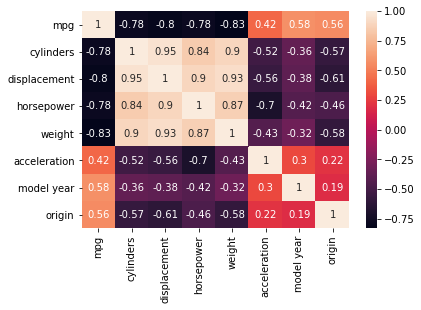

In [37]:
import seaborn as sns
corrmat = dataset.corr()
sns.heatmap(corrmat,annot = True)

Nous voulons prédire la variable mpg. Nous remarquons sur la matrice de confusion que sa variable explicative (la variable la plus corrélée avec mpg) est la variable weight. 
En effet, le coefficient de corrélation entre ces deux variables est à -0.83, ce qui est supérieur au seuil de 0.8 par conséquent la régression linéaire est intéressante et ces deux variables sont liées de manière décroissante.

###### 5.2. Régression linéaire sur les données complètes
###### a) Séparer les données en base d’apprentissage (70%) et de test. 
###### b) Déterminer les coefficients de la droite de régression (fonction fit) sur les données d’apprentissage.
###### c) Effectuer les prédictions sur les données de test (fonction predict) et estimer les performances : RMSE (Root Mean Squared Error) et R2 (r2_score)


In [59]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

data = analyse_cas_concrets(dataset) #on enlève les lignes contenant des NA

X = data['weight']
y = data['mpg']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, test_size=0.3)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [56]:
modele_linear_regression = LinearRegression().fit(X_train.values.reshape(-1, 1), y_train)
print("Les coefficients a et b de la droite de régression sont :", modele_linear_regression.coef_, "et", modele_linear_regression.intercept_)

Les coefficients a et b de la droite de régression sont : [-0.00763482] et 46.261823036533286


In [63]:
#on fait les prédictions 
y_pred = modele_linear_regression.predict(X_test.values.reshape(-1, 1))
y_pred

array([13.34048816, 22.15106804, 17.0204704 , 31.25940582, 32.24429733,
       23.86890208, 27.09079524, 32.25956697, 17.7457781 , 29.55684143,
       28.97659527,  8.4542047 , 21.33414253, 23.05961138, 31.335754  ,
       29.31252725, 14.5467894 , 29.04530863, 12.82132055, 27.12896933,
       22.70077493, 26.85411588, 14.95906956, 12.17999584, 26.29677418,
       17.82212628, 22.29612958, 20.07439757, 12.23343957, 26.62507135,
       26.51054908, 23.1970381 , 29.78588596, 25.91503328, 30.04546977,
       30.03020014, 16.94412222, 31.10670946, 11.91277721, 23.73911017,
       15.09649629, 21.88384942, 28.12913048, 28.00697339, 19.92933603,
       13.16488735, 31.10670946, 29.54157179, 24.11321625, 26.83121143,
       17.59308175, 18.73830443, 26.47237499, 17.08918376, 29.42704952,
       25.22789967, 16.5089376 , 30.49592403, 16.54711169, 18.28785018,
       31.10670946, 24.36516524, 21.74642269, 20.45613847, 14.12687441,
       29.96148678, 30.05310459, 23.24284701, 14.0810655 , 22.06

On utilise deux métriques pour l’évaluation : 

- L’erreur quadratique moyenne (l’erreur d’estimation)
- R-square (la qualité du modèle de régression)

In [66]:
#on estime les performances
mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(18.264447834830616, 0.6726739786270188)

###### 5.3. Régression linéaire sur les données manquantes après imputation
###### Répéter les expériences précédentes en considérant successivement 20% et 50% de données manquantes imputées.
###### Présenter les résultats sous forme d’un graphe comparatif que vous commenterez.


On utilise un dataframe avec les deux seules colonnes qui nous intéressent : mpg et weight.

In [74]:
df10 = dataset[['mpg','weight']]
print(df10.isna().sum())
df10.head()

mpg       8
weight    0
dtype: int64


,mpg,weight
0,18.0,3504.0
1,15.0,3693.0
2,18.0,3436.0
3,16.0,3433.0
4,17.0,3449.0


On supprime 80% des données manquantes et on impute les 20% restants avec la méthode d'imputation multiple => il ne doit plus rester de NA car la régression linéaire est impossible si des NA sont présentes.
Nous avons 8 NA dans la colonne mpg et 0 dans weight, nous gardons donc 20% des NA. Il nous en restera 2 ce qui correspond à un taux de 0.0049.

Avant imputation
 mpg       2
weight    0
dtype: int64


Après imputation
 0    0
1    0
dtype: int64


Les coefficients a et b de la droite de régression sont : [-0.00785565] et 46.94074873746206


L'erreur quadratique moyenne et la R² (qualité du modèle de régression) sont : 15.676588217316935 0.7308512067500534


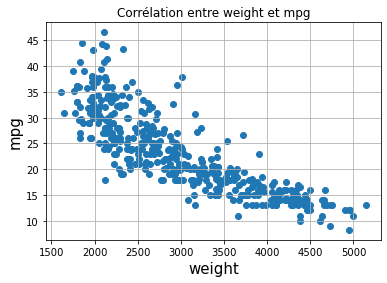

In [137]:
import matplotlib.pyplot as plt

df11 = df10.copy()
df11 = df11.dropna(axis=0)
taux_NA = (df11['mpg'].isna().sum())/len(df11)
while (taux_NA <= 0.0049):
    df11['mpg'][randrange(len(df11))] = np.nan
    taux_NA = (df11['mpg'].isna().sum())/len(df11)

#nous avons bien plus que 2 NA
print('Avant imputation\n',df11.isna().sum())    
print('\n')

#imputons les NA
imputation_multp = IterativeImputer(random_state=0)
df11=pd.DataFrame(imputation_multp.fit_transform(df11))
df11.columns=df11.columns
df11.index=df11.index
print('Après imputation\n',df11.isna().sum()) 
print('\n')

#on calcule les coeff de la droite de régression et les performances
X1 = df11[1]
y1 = df11[0]
X_train1, X_test1, y_train1, y_test1 = model_selection.train_test_split(X1, y1, train_size=0.7, test_size=0.3,random_state=42)
modele_linear_regression2 = LinearRegression().fit(X_train1.values.reshape(-1, 1),y_train1)
print("Les coefficients a et b de la droite de régression sont :", modele_linear_regression2.coef_, "et", modele_linear_regression2.intercept_)
print('\n')

#on fait nos prédictions et on sort les performances
y_pred1 = modele_linear_regression2.predict(X_test1.values.reshape(-1, 1))
print("L'erreur quadratique moyenne et la R² (qualité du modèle de régression) sont :",mean_squared_error(y_test1, y_pred1), r2_score(y_test1, y_pred1))

#on dessine le nuage de points 
axes = plt.axes()
axes.grid()
plt.scatter(X1,y1)
plt.title('Corrélation entre weight et mpg')
plt.xlabel('weight', fontsize=15)
plt.ylabel('mpg', fontsize=15)
plt.show()

On supprime 50% des données manquantes et on impute les 50% restants avec la méthode d'imputation multiple.
Nous avons 8 NA dans la colonne mpg et 0 dans weight, nous gardons donc 50% des NA. Il nous en restera 4 ce qui correspond à un taux de 0.01.

Avant imputation
 mpg       4
weight    0
dtype: int64


Après imputation
 0    0
1    0
dtype: int64


Les coefficients a et b de la droite de régression sont : [-0.00786042] et 47.00286713769982


L'erreur quadratique moyenne et la R² (qualité du modèle de régression) sont : 15.845145233843933 0.7229439763739375


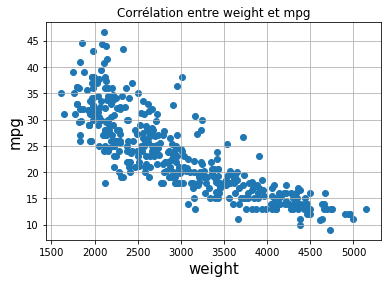

In [138]:
import matplotlib.pyplot as plt

df12 = df10.copy()
df12 = df12.dropna(axis=0)
taux_NA = (df12['mpg'].isna().sum())/len(df12)
while (taux_NA <= 0.01):
    df12['mpg'][randrange(len(df12))] = np.nan
    taux_NA = (df12['mpg'].isna().sum())/len(df12)

#nous avons bien plus que 2 NA
print('Avant imputation\n',df12.isna().sum())    
print('\n')

#imputons les NA
imputation_multp = IterativeImputer(random_state=0)
df12=pd.DataFrame(imputation_multp.fit_transform(df12))
df12.columns=df12.columns
df12.index=df12.index
print('Après imputation\n',df12.isna().sum()) 
print('\n')

#on calcule les coeff de la droite de régression et les performances
X2 = df12[1]
y2 = df12[0]
X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split(X2, y2, train_size=0.7, test_size=0.3,random_state=42)
modele_linear_regression3 = LinearRegression().fit(X_train2.values.reshape(-1, 1),y_train2)
print("Les coefficients a et b de la droite de régression sont :", modele_linear_regression3.coef_, "et", modele_linear_regression3.intercept_)
print('\n')

#on fait nos prédictions et on sort les performances
y_pred2 = modele_linear_regression3.predict(X_test2.values.reshape(-1, 1))
print("L'erreur quadratique moyenne et la R² (qualité du modèle de régression) sont :",mean_squared_error(y_test2, y_pred2), r2_score(y_test2, y_pred2))

#on dessine le nuage de points 
axes = plt.axes()
axes.grid()
plt.scatter(X2,y2) 
plt.title('Corrélation entre weight et mpg')
plt.xlabel('weight', fontsize=15)
plt.ylabel('mpg', fontsize=15)
plt.show()

###### 5.4.Pour finir…
###### Deux variables sont corrélées en valeur absolue… retournez au 5.1 pour vérifier la pertinence de votre choix.
###### Une corrélation linéaire peut être encore améliorée en transformant astucieusement les données : comment ?
###### En tenant compte de ces deux remarques, refaire les parties 5.2 et 5.3 si nécessaire.
###### Une grossière erreur s’est glissée quelque part. La question est : où ? Expliquez.

Une corrélation linéaire peut-être améliorée en utilisant la méthode des moyennes mobiles.
A l'image d'une série chronologique, nous pouvons utiliser cette méthode pour lisser davantage nos données et ainsi améliorer la corrélation.

L'erreur réside dans le fait qu'à aucun moment nous ne tenons compte du type de variable manquante lorsque l'on fait les imputations.